In [1]:
from IPython.core.debugger import set_trace

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [2]:
df = pd.read_csv("AXISBANK.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [4]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,1.990907e+06,0.466962
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,3.264587e+06,0.161808
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000,2.573130e+05,0.347500
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000,7.687680e+05,0.459800
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,2.652520e+06,0.573900
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [6]:
df.set_index("Date", drop=True, inplace=True)

In [7]:
df = df[["Close"]]

In [8]:
df.describe()

,Close
count,5306.000000
mean,585.893931
std,436.649765
min,22.150000
25%,230.975000
50%,519.500000
75%,877.312500
max,2023.350000


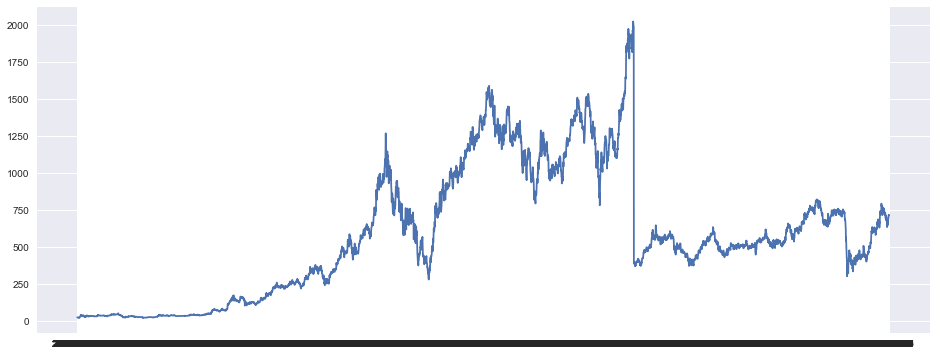

In [9]:
plt.figure(figsize=(16, 6))
p= plt.plot(df.Close)

In [10]:
df["returns"] = df.Close.pct_change()

In [11]:
df.head(5)

,Close,returns
Date,,
2000-01-03,26.70,NaN
2000-01-04,26.85,0.005618
2000-01-05,26.30,-0.020484
2000-01-06,25.95,-0.013308
2000-01-07,24.80,-0.044316


In [13]:
df["log_returns"] = np.log(1 + df["returns"])

In [14]:
df.head(5)

,Close,returns,log_returns
Date,,,
2000-01-03,26.70,NaN,NaN
2000-01-04,26.85,0.005618,0.005602
2000-01-05,26.30,-0.020484,-0.020697
2000-01-06,25.95,-0.013308,-0.013397
2000-01-07,24.80,-0.044316,-0.045328


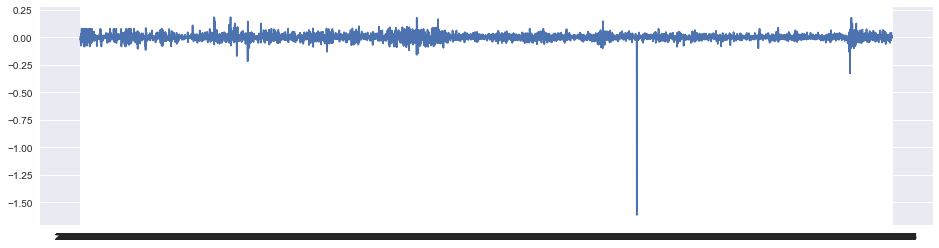

In [15]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.log_returns)

In [16]:
df.dropna(inplace=True)
X = df[["Close", "log_returns"]].values

In [17]:
X

array([[ 2.68500000e+01,  5.60225555e-03],
       [ 2.63000000e+01, -2.06968818e-02],
       [ 2.59500000e+01, -1.33973296e-02],
       ...,
       [ 7.08150000e+02,  1.22186645e-02],
       [ 7.19400000e+02,  1.57615956e-02],
       [ 7.14900000e+02, -6.27485849e-03]])

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X_scaled = scaler.transform(X)

In [20]:
X_scaled[:5]

array([[0.00234859, 0.90144592],
       [0.00207376, 0.88680804],
       [0.00189886, 0.89087091],
       [0.00132421, 0.8730986 ],
       [0.00142415, 0.90279839]])

In [21]:
y = [x[0] for x in X_scaled]

In [22]:
y[:5]

[0.0023485908454927065,
 0.00207375574655207,
 0.0018988606835898484,
 0.001324205476713974,
 0.0014241455126923867]

In [23]:
split = int(len(X_scaled) * 0.8)
print(split)

4244


In [24]:
X_train = X_scaled[:split]
X_test = X_scaled[split : len(X_scaled)]
y_train = y[:split]
y_test = y[split : len(y)]

In [25]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [26]:
n = 5
Xtrain = []
ytrain = []
Xtest = []
ytest = []
for i in range(n, len(X_train)):
    Xtrain.append(X_train[i - n : i, : X_train.shape[1]])
    ytrain.append(y_train[i])  # predict next record
for i in range(n, len(X_test)):
    Xtest.append(X_test[i - n : i, : X_test.shape[1]])
    ytest.append(y_test[i])  # predict next record

In [27]:
df.head(5)

,Close,returns,log_returns
Date,,,
2000-01-04,26.85,0.005618,0.005602
2000-01-05,26.30,-0.020484,-0.020697
2000-01-06,25.95,-0.013308,-0.013397
2000-01-07,24.80,-0.044316,-0.045328
2000-01-10,25.00,0.008065,0.008032


In [28]:
Xtrain[0]

array([[0.00234859, 0.90144592],
       [0.00207376, 0.88680804],
       [0.00189886, 0.89087091],
       [0.00132421, 0.8730986 ],
       [0.00142415, 0.90279839]])

In [29]:
ytrain[0]

0.0005246851888866689

In [30]:
val = np.array(ytrain[0])
val = np.c_[val, np.zeros(val.shape)]

In [31]:
scaler.inverse_transform(val)

array([[23.2       , -1.61398051]])

In [32]:
Xtrain, ytrain = (np.array(Xtrain), np.array(ytrain))
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], Xtrain.shape[2]))

Xtest, ytest = (np.array(Xtest), np.array(ytest))
Xtest = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], Xtest.shape[2]))

In [33]:
print(Xtrain.shape)
print(ytrain.shape)
print("---")
print(Xtest.shape)
print(ytest.shape)

(4239, 5, 2)
(4239,)
---
(1056, 5, 2)
(1056,)


In [34]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [35]:
model = Sequential()
model.add(LSTM(4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")
model.fit(
    Xtrain, ytrain, epochs=250, validation_data=(Xtest, ytest), batch_size=16, verbose=1
)

Epoch 1/250
265/265 [==============================] - 18s 4ms/step - loss: 0.0801 - val_loss: 9.4331e-04
Epoch 2/250
265/265 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 2.2517e-04
Epoch 3/250
265/265 [==============================] - 0s 2ms/step - loss: 5.8761e-04 - val_loss: 1.1203e-04
Epoch 4/250
265/265 [==============================] - 0s 2ms/step - loss: 3.9021e-04 - val_loss: 1.0088e-04
Epoch 5/250
265/265 [==============================] - 0s 2ms/step - loss: 4.2679e-04 - val_loss: 9.6368e-05
Epoch 6/250
265/265 [==============================] - 0s 2ms/step - loss: 3.0715e-04 - val_loss: 1.8667e-04
Epoch 7/250
265/265 [==============================] - 0s 2ms/step - loss: 5.1545e-04 - val_loss: 9.5448e-05
Epoch 8/250
265/265 [==============================] - 0s 2ms/step - loss: 5.5611e-04 - val_loss: 9.5397e-05
Epoch 9/250
265/265 [==============================] - 0s 2ms/step - loss: 4.5649e-04 - val_loss: 9.4805e-05
Epoch 10/250
265/265 [====

265/265 [==============================] - 0s 2ms/step - loss: 8.8460e-05 - val_loss: 8.4957e-05
Epoch 150/250
265/265 [==============================] - 0s 1ms/step - loss: 3.2269e-04 - val_loss: 4.5127e-05
Epoch 151/250
265/265 [==============================] - 0s 2ms/step - loss: 2.5961e-04 - val_loss: 4.7634e-05
Epoch 152/250
265/265 [==============================] - 0s 2ms/step - loss: 2.6409e-04 - val_loss: 5.2765e-05
Epoch 153/250
265/265 [==============================] - 0s 2ms/step - loss: 1.5083e-04 - val_loss: 4.4373e-05
Epoch 154/250
265/265 [==============================] - 0s 2ms/step - loss: 2.9684e-04 - val_loss: 4.5032e-05
Epoch 155/250
265/265 [==============================] - 0s 2ms/step - loss: 2.2631e-04 - val_loss: 5.9223e-05
Epoch 156/250
265/265 [==============================] - 0s 2ms/step - loss: 2.7909e-04 - val_loss: 5.1645e-05
Epoch 157/250
265/265 [==============================] - 1s 2ms/step - loss: 9.6091e-05 - val_loss: 1.0177e-04
Epoch 158/250
2

Epoch 223/250
265/265 [==============================] - 0s 2ms/step - loss: 1.0161e-04 - val_loss: 1.9075e-04
Epoch 224/250
265/265 [==============================] - 0s 2ms/step - loss: 1.5650e-04 - val_loss: 4.4212e-05
Epoch 225/250
265/265 [==============================] - 0s 2ms/step - loss: 2.6174e-04 - val_loss: 4.5005e-05
Epoch 226/250
265/265 [==============================] - 1s 2ms/step - loss: 4.7929e-04 - val_loss: 5.4320e-05
Epoch 227/250
265/265 [==============================] - 1s 2ms/step - loss: 1.7318e-04 - val_loss: 5.2663e-05
Epoch 228/250
265/265 [==============================] - 1s 2ms/step - loss: 1.7348e-04 - val_loss: 4.8858e-05
Epoch 229/250
265/265 [==============================] - 1s 3ms/step - loss: 4.6231e-04 - val_loss: 4.8383e-05
Epoch 230/250
265/265 [==============================] - 0s 2ms/step - loss: 3.7311e-04 - val_loss: 4.6711e-05
Epoch 231/250
265/265 [==============================] - 0s 2ms/step - loss: 2.2768e-04 - val_loss: 4.5917e-05
E

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 112       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


In [37]:
trainPredict = model.predict(Xtrain)
testPredict = model.predict(Xtest)



In [38]:
trainPredict = np.c_[trainPredict, np.zeros(trainPredict.shape)]
testPredict = np.c_[testPredict, np.zeros(testPredict.shape)]

In [39]:
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = [x[0] for x in trainPredict]

testPredict = scaler.inverse_transform(testPredict)
testPredict = [x[0] for x in testPredict]


In [40]:
print(trainPredict[len(trainPredict)-5:])
print(testPredict[len(testPredict)-5:])

[458.93052068948737, 456.6099720716476, 450.81441546678536, 457.1444694042205, 458.4899868190288]
[676.8263918757438, 706.6777875900267, 705.4703675389288, 715.3376344084738, 726.435700368881]


In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
trainScore = mean_squared_error([x[0][0] for x in Xtrain], trainPredict, squared=False)
print("Train Score: %.2f RMSE" % (trainScore))

testScore = mean_squared_error([x[0][0] for x in Xtest], testPredict, squared=False)
print("Test Score: %.2f RMSE" % (testScore))

Train Score: 762.89 RMSE
Test Score: 604.99 RMSE


## TEST SCORE PREDICTION

In [43]:
a=(testPredict[len(testPredict)-5:])

In [44]:
for i in a:
       print(i)

676.8263918757438
706.6777875900267
705.4703675389288
715.3376344084738
726.435700368881
